In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf


In [6]:
haadf_dir = '../../secondary_data/main_mosaic_5by6_haadf.npz'
bit_depth = 16

In [7]:
haadfs = np.load(haadf_dir)['haadf']
medians = []

for i in range(haadfs.shape[2]):
    medians.append(np.median(haadfs[:,:,i]))

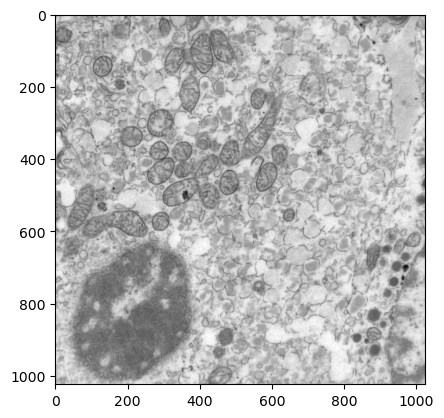

In [10]:
haadfs_corr = np.zeros(haadfs.shape)
for i in range(haadfs_corr.shape[2]):
    median = np.median(haadfs[:,:,i])
    factor = median - np.min(medians)
    haadfs_corr[:,:,i] = haadfs[:,:,i] - factor

haadfs_corr = np.invert(((haadfs_corr-np.min(haadfs_corr))/(np.max(haadfs_corr)-np.min(haadfs_corr))*(pow(2,bit_depth)-1)).astype(('uint' + str(bit_depth))))
plt.imshow(haadfs_corr[:,:,0], cmap= 'gray')

In [11]:
tf.imwrite("../../secondary_data/main_mosaic_5by6_haadf.tiff", haadfs_corr.transpose(2,0,1))